**Hardware information**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.146
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.29
clflush size	: 64
cache_alignment	: 64
address sizes

**Disk information**

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   37G  189G  17% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   36K  6.4G   1% /var/colab
/dev/sda1       233G   38G  195G  17% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


**Memory information**

In [ ]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:        10382380 kB
MemAvailable:   12023804 kB
Buffers:           83556 kB
Cached:          1684312 kB
SwapCached:            0 kB
Active:           526716 kB
Inactive:        2190376 kB
Active(anon):        952 kB
Inactive(anon):   874884 kB
Active(file):     525764 kB
Inactive(file):  1315492 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               440 kB
Writeback:             0 kB
AnonPages:        949412 kB
Mapped:           226452 kB
Shmem:              1272 kB
KReclaimable:      83240 kB
Slab:             113320 kB
SReclaimable:      83240 kB
SUnreclaim:        30080 kB
KernelStack:        4592 kB
PageTables:        21544 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2951688 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9428 kB
VmallocChunk:          0 kB
Percpu:          

**Imports of libraries to be used**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

**Dataset load**

In [ ]:
iris = sns.load_dataset("iris")


**Estimated distributions**

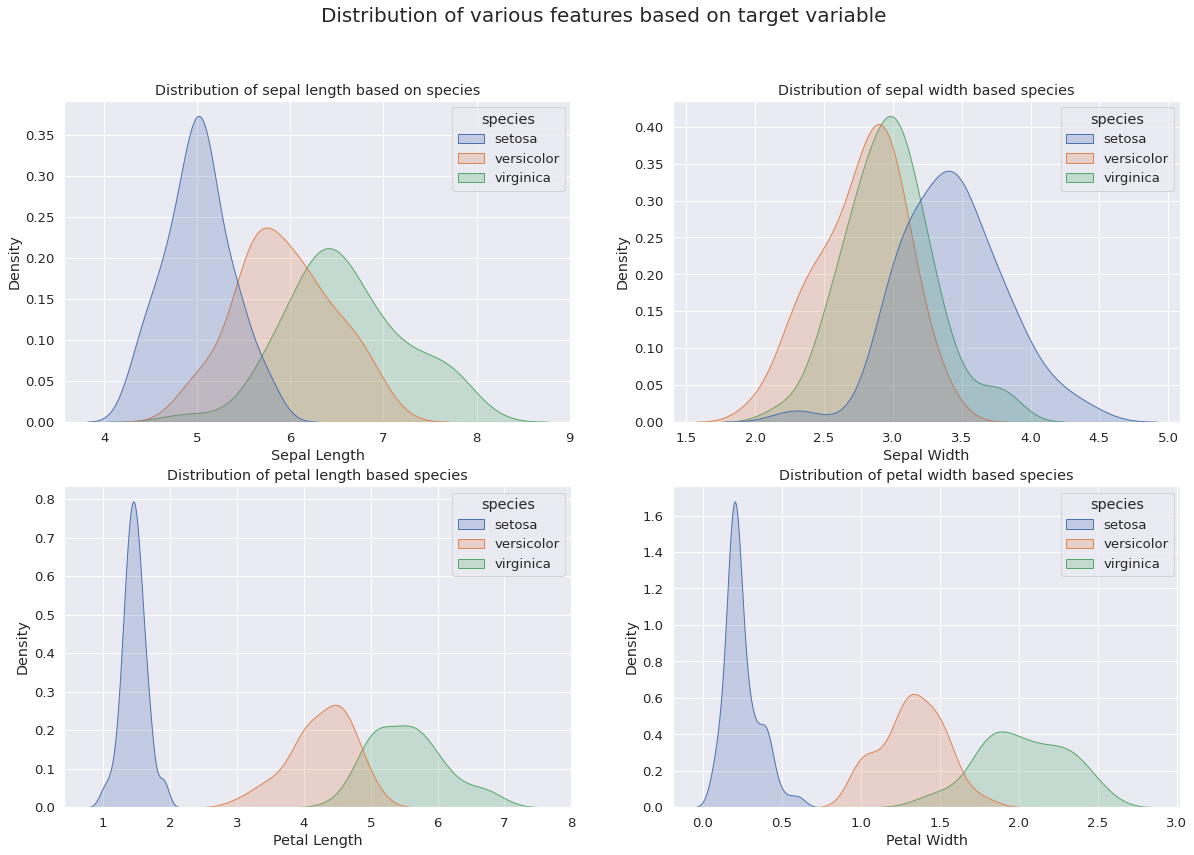

In [11]:
import seaborn as sns
sns.set()

sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='sepal_length', data= iris, hue= 'species', shade= True, ax= ax[0, 0]) #palette="crest")
ax1.set(xlabel = 'Sepal Length', title= 'Distribution of sepal length based on species')

ax2 = sns.kdeplot(x ='sepal_width', data= iris, hue= 'species', shade= True, ax= ax[0, 1])
ax2.set(xlabel = 'Sepal Width', title= 'Distribution of sepal width based species')

ax3 = sns.kdeplot(x ='petal_length', data= iris, hue= 'species', shade= True, ax= ax[1, 0])
ax3.set(xlabel = 'Petal Length', title= 'Distribution of petal length based species')

ax4 = sns.kdeplot(x ='petal_width', data= iris, hue= 'species', shade= True, ax= ax[1, 1])
ax4.set(xlabel = 'Petal Width', title= 'Distribution of petal width based species')

plt.show()

**Show first 5 rows of dataset**

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Dataset information**

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Dataset columns statistics**

In [14]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Species counts**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


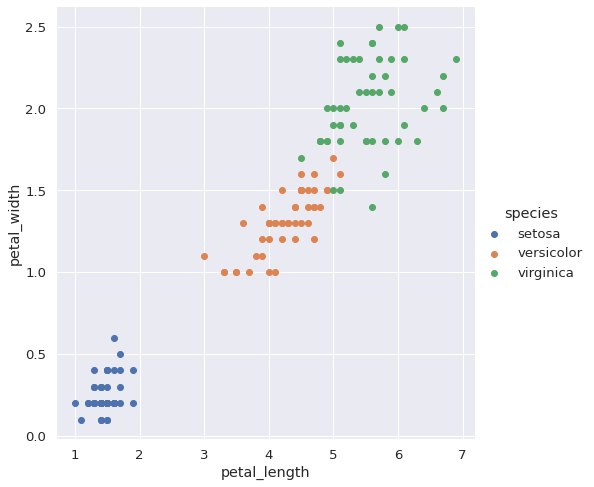

In [16]:
iris['species'].value_counts()
sns.FacetGrid(iris,hue="species",size=7).map(plt.scatter,'petal_length','petal_width').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


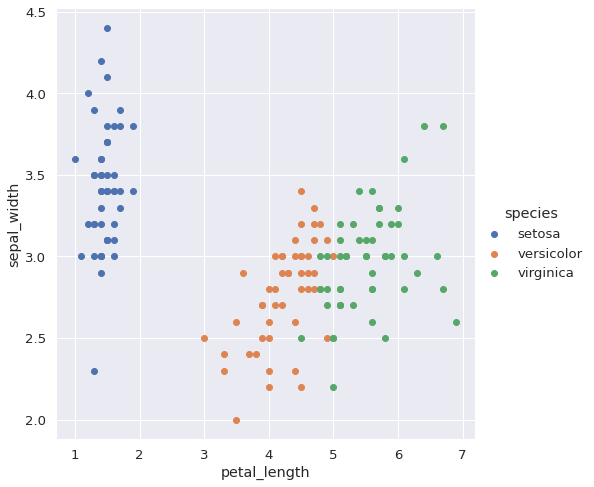

In [17]:
sns.FacetGrid(iris,hue="species",size=7).map(plt.scatter,'petal_length','sepal_width').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


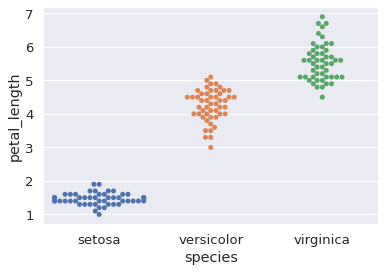

In [18]:
sns.swarmplot(iris['species'],iris['petal_length'],data=iris)

**Assigment of inputs and outputs**

In [19]:
x=iris.iloc[:,:-1].values

In [20]:
y=iris.iloc[:,-1].values

**Example of species in different positions**

In [21]:
y[1]

'setosa'

In [22]:
y[100]

'virginica'

In [23]:
y[99]

'versicolor'

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb=GaussianNB()

**Dataset partition is test and train**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [27]:
x_train.shape


(112, 4)

In [28]:
x_test.shape

(38, 4)

**Train the model**

In [29]:
gnb.fit(x_train,y_train)

GaussianNB()

**Model testing with the train set to identify possible overfitting**

In [30]:
y_pred_train=gnb.predict(x_train)

**Confusion matrix of train set**

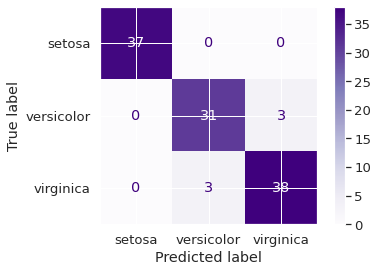

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_train, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Purples)
plt.show()

In [54]:
cm = confusion_matrix(y_train, y_pred_train, normalize='all')
cm

array([[0.33035714, 0.        , 0.        ],
       [0.        , 0.27678571, 0.02678571],
       [0.        , 0.02678571, 0.33928571]])

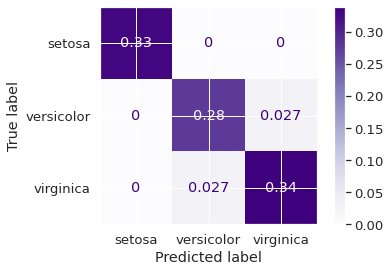

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Purples)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)
accuracy_score(y_train,y_pred_train,normalize=False)

106

In [57]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.91      0.91      0.91        34
   virginica       0.93      0.93      0.93        41

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



**Prediction of values in test set**

In [59]:

y_pred = gnb.predict(x_test)
gnb.score(x_test,y_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

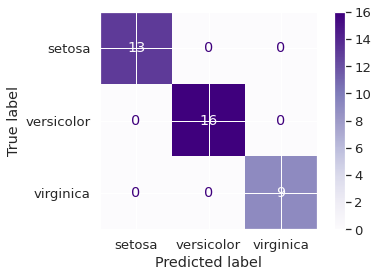

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Purples)

**Test of one entry**

In [61]:
prueba=x[100]

In [62]:
prueba

array([6.3, 3.3, 6. , 2.5])

In [63]:
y_prueba=gnb.predict(prueba.reshape(-1,4))
print('The test classification is:', y_prueba)

The test classification is: ['virginica']


In [64]:
y[100]

'virginica'